# Annotation round 2 - Annotation round

In [1]:
import os,sys
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [2]:
figdir = "/home/jovyan/mount/gdrive/Pan_fetal/Updates_and_presentations/figures/annotation_lift2NEW/"
if not os.path.exists(figdir):
    os.mkdir(figdir)
sc.settings.figdir = figdir

In [3]:
## Load existing annotation
obs = pd.read_csv('/nfs/team205/ed6/data/Fetal_immune/PAN.A01.v01.entire_data_normalised_log.20210429.full_obs.annotated.clean.csv', index_col = 0) # final annotations and removed maternal contaminant cells

## Load annotation groups
import json
with open('../../metadata/anno_groups.json', 'r') as json_file:
    anno_groups_dict = json.load(json_file)

/home/jovyan/my-conda-envs/emma_env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## LYMPHOID

In [4]:
data_dir = '/nfs/team205/ed6/data/Fetal_immune/'
spl = 'LYMPHOID_NEW_POSTQC'
adata = sc.read_h5ad(data_dir + f"PAN.A01.v01.entire_data_normalised_log.20210429.{spl}.h5ad")
adata.var_names_make_unique()

In [5]:
adata

AnnData object with n_obs × n_vars = 228142 × 33538
    obs: 'n_counts', 'n_genes', 'file', 'mito', 'doublet_scores', 'name', 'uniform_label', 'uniform_label_expanded_merged', 'uniform_label_lvl0', 'organ', 'Sample.lanes', 'Sort_id', 'age', 'method', 'donor', 'sex', 'Processing_method', 'AnnatomicalPart', 'Sample', 'scvi_clusters', 'uniform_label_propagated', 'uniform_label_lvl0_propagated', 'uniform_label_expanded_merged_propagated', 'leiden_150', 'leiden_150_pred_label', 'leiden_150_pred_label_expanded', 'isin_STROMA', 'isin_HSC_IMMUNE', 'isin_LYMPHOID', 'isin_MYELOID', 'isin_MYELOID_LYMPHOID', 'isin_MEM_PROGENITORS', 'annotation_obs', 'annotation_4qc'
    var: 'GeneID', 'GeneName'
    uns: 'annotation_obs_colors', 'isin_HSC_IMMUNE_colors', 'isin_LYMPHOID_colors', 'isin_MEM_PROGENITORS_colors', 'isin_MYELOID_LYMPHOID_colors', 'isin_MYELOID_colors', 'isin_STROMA_colors', 'leiden', 'leiden_150_colors', 'leiden_150_pred_label_expanded_colors', 'method_colors', 'scvi', 'scvi_clusters_col

In [5]:
# ## Load old annotations
# adata.obs['annotation_obs'] = obs.loc[adata.obs_names]['anno_lvl_2_final_clean']

In [8]:
adata.obs['annotation_obs'].value_counts()

NK                             30244
DP(P)_T                        22670
MATURE_B                       17383
DN(Q)_T                        13640
CD4+T                          13584
DP(Q)_T                        12279
LARGE_PRE_B                     9884
DN(P)_T                         9780
CD8+T                           9301
SMALL_PRE_B                     8220
PRO_B                           7629
ABT(ENTRY)                      7006
CYCLING_NK                      6981
LATE_PRO_B                      6333
TREG                            6303
ILC3                            5909
TYPE_1_INNATE_T                 5696
B1                              5557
HSC_MPP                         3616
TYPE_3_INNATE_T                 3010
CYCLING_T                       2901
PRE_PRO_B                       2886
IMMATURE_B                      2676
CD8AA                           2291
CYCLING_MPP                     2199
CYCLING_B                       1867
DN(early)_T                     1657
M

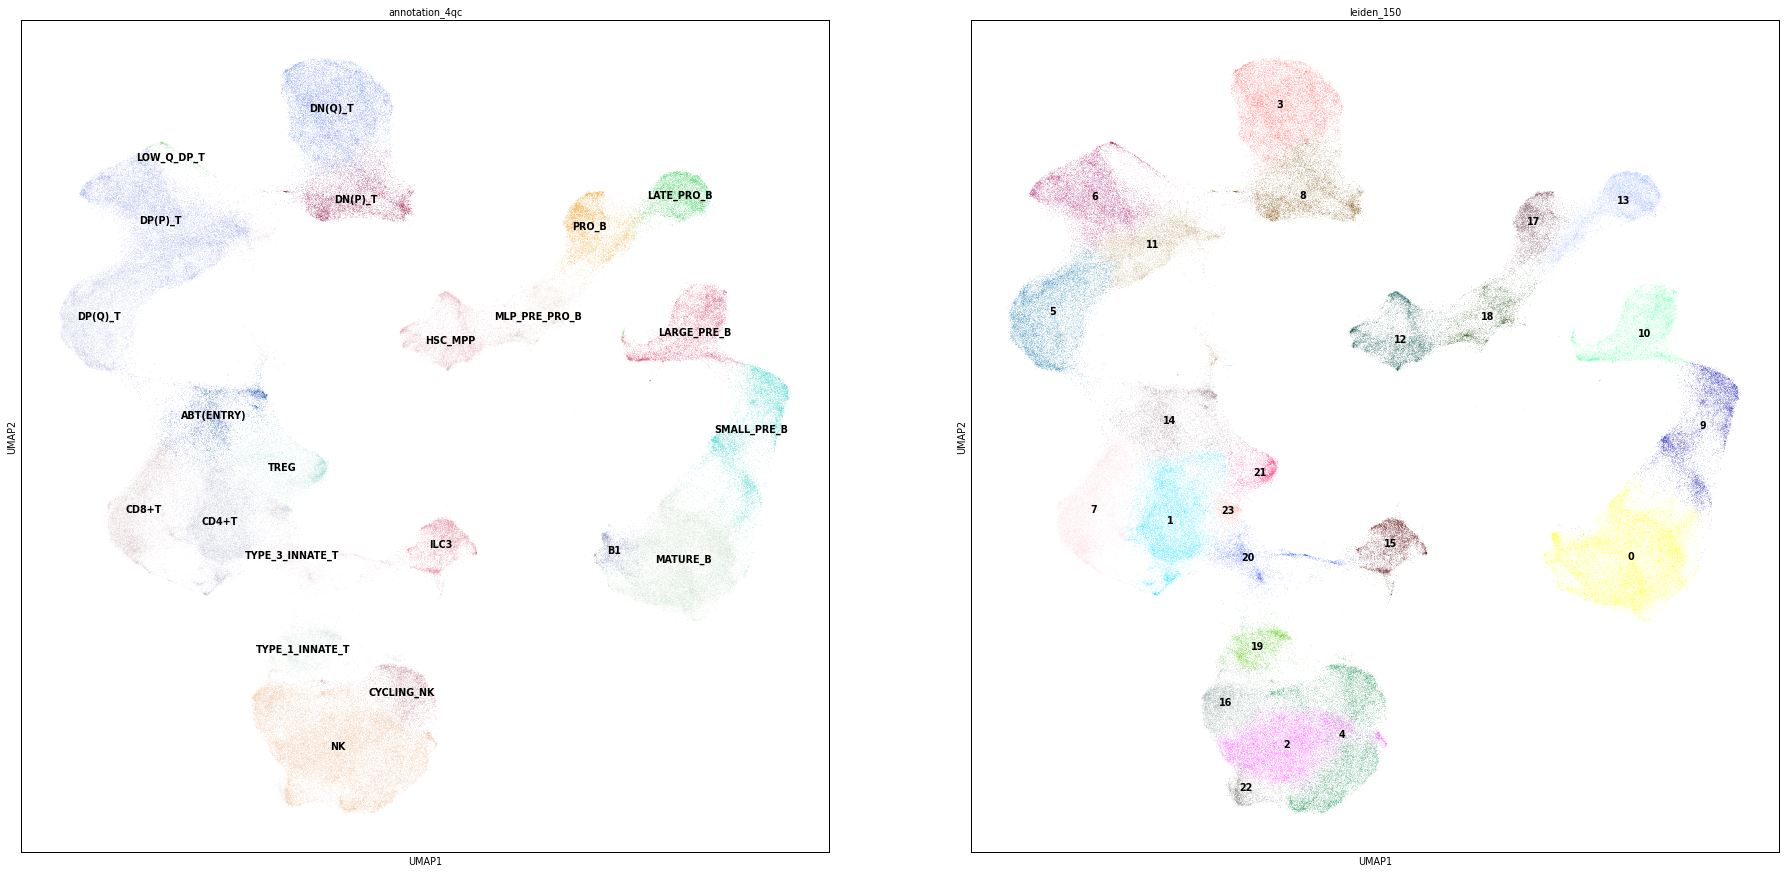

In [10]:
plt.rcParams['figure.figsize'] = [15,15]
sns.set_context("paper")
sc.pl.umap(adata, color=['annotation_4qc', 'leiden_150'], legend_loc='on data', save='UMAPs_LYMPHOID_NEW_POSTQC.png')

In [11]:
# markers = pd.read_csv('../../metadata/marker_genes/B_marker_genes_09072021_clean.csv', index_col=0)
# markers_dict = {a:markers.loc[markers['anno_lvl_2']==a, 'gene'].tolist() for a in markers['anno_lvl_2'].unique()}
markers = {
            ## Progenitors
            'HSC_MPP':['CLEC9A','HLF','CD34','SPINK2'],
           'MLP':['BCL11A','IL7R','IL2RG'],
           'B lineage':['CD19','VPREB1','PAX5'],
           'T lineage':['CD3D','BCL11B'],
           'MEMP':['GATA2'],
           'MEP':['KLF1','ITGA2B'],
           'Ery lineage':['HBB','HBG1'],
           'Myeloid lineage':['MPO','CSF1R','CEBPA'],
            ## B cells
            'lymphoid progenitor':['CD34','SPINK2','IL7R','KIT'],
           'PRE PRO B':['FLT3','CD19','VPREB1'], 
           'PRO B':['MME','CDC45','DHFR','MKI67'], 
           'LATE PRO B':['CD27','RAG1','DNTT','VPREB3'], 
           'PRO -> PRE':['CD24','TNFRSF17'], 
           'PRE -> IMMATURE':['MME','IDH2','SPIB','IL4R','IGHM'], 
           'MATURE':['IGHD','MS4A1','CD40','FCER2'], 
           'B1':['CD27','SPN','CCR10'],
           'PLASMA B':['JCHAIN','SDC1','CD38'],
           'CYCLING_B':['MKI67'],
           ## T cells
           'DN(early)':['IGLL1','ST18'],
           'DN(P)':['TRGC2','TRDC','HIVEP3'],
           'DN(Q)':['RAG1','RAG2','TP53INP1','PTCRA','RGPD3'],
           'DP(P)':['SMPD3'], 
           'DP(Q)':['AQP3','RORC'], 
           'abT(entry)':['CCR9','SATB1','TOX2'], 
           'MATURE_T':['CCR7','CD5','CD27','CD8A','CD8B','CD4'], 
           'Treg':['FOXP3','CTLA4'], 
           'CD8aa':['PDCD1','GNG4','ZNF683'], 
           'innate':['KLRB1','ZBTB16'],
           'TYPE_3_INNATE_T':['CD40LG','RORC','CCR6','ANXA1'],
           'ILC3': ['RORC','IL1R1','IL23R','KIT'],
           'ILC2':['PTGDR2','HPGDS','GATA3'],
           'TYPE_1_INNATE_T':['NKG7','EOMES','TBX21','IFNG-AS1'],
           'NK': ['KLRD1','KLRF1','NKG7','NCAM1'],
           'CYCLING':['MKI67'],
          }

cell_type_order = [
    ## B cell order
    'LMPP_MLP','PRE_PRO_B','PRO_B','LATE_PRO_B','LARGE_PRE_B','SMALL_PRE_B','IMMATURE_B','MATURE_B','B1','PLASMA_B','CYCLING_B',
    ## T cells order
    'DN(early)_T','DN(P)_T','DN(Q)_T','DP(P)_T','DP(Q)_T','ABT(ENTRY)','CD8+T',
    'CD4+T','TREG','CYCLING_T','CD8AA','TYPE_3_INNATE_T','ILC3','ILC2','CYCLING_ILC',
    'TYPE_1_INNATE_T','NK','CYCLING_NK'
]

cell_type_order = anno_groups_dict['PROGENITORS'] + cell_type_order + anno_groups_dict['OTHER']

### Confusion matrix

In [192]:
conf_mat = sc.metrics.confusion_matrix( 'leiden_150', 'annotation_obs', adata.obs, normalize=True).T

## Keep cts that make up at least 1% of a cluster
keep_cts_ixs = np.where(conf_mat.max(1) > 0.01)[0] 
conf_mat = conf_mat.iloc[keep_cts_ixs]

## Reorder annotations
conf_mat_order = [x for x in cell_type_order if x in conf_mat.index] + conf_mat.index[~conf_mat.index.isin(cell_type_order)].tolist()
conf_mat = conf_mat.loc[conf_mat_order]

## Sort to have some sort of diagonal
col_order = conf_mat.idxmax(0).astype('category').cat.set_categories(cell_type_order).sort_values().index
conf_mat = conf_mat[col_order]

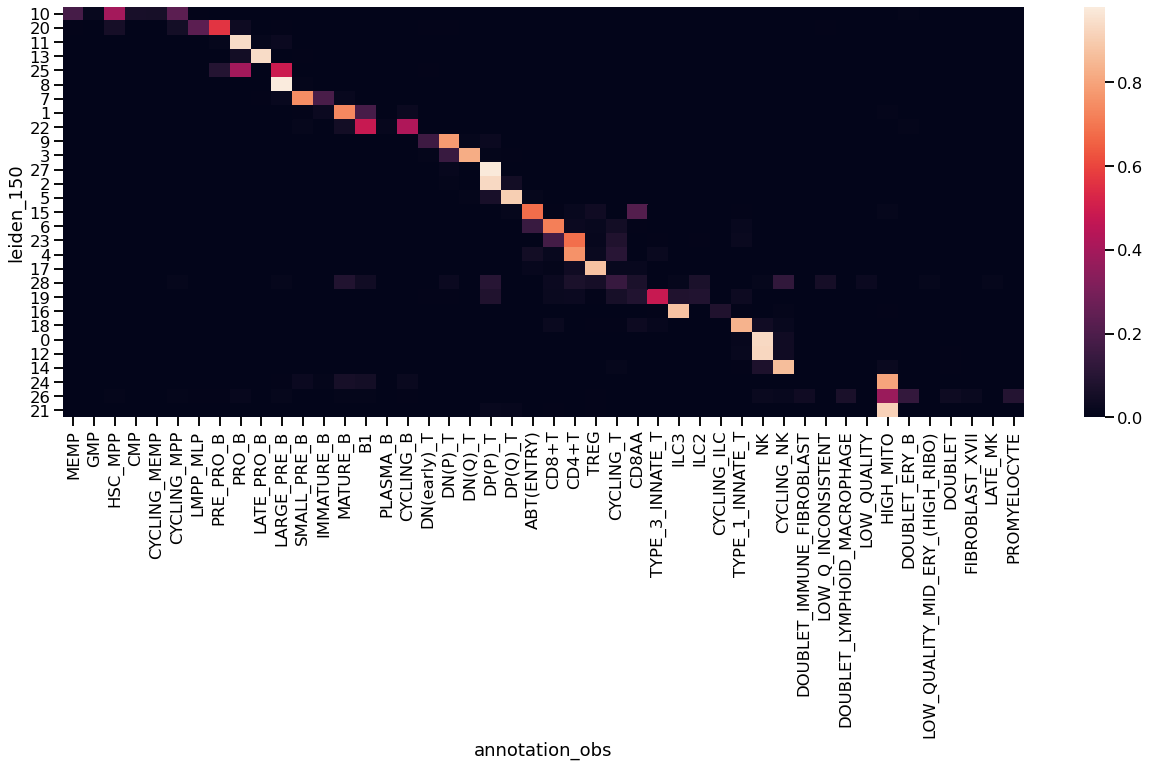

In [193]:
sns.set_context('talk')
plt.rcParams['figure.figsize'] = [18,11]
sns.heatmap(conf_mat.T, xticklabels=True, yticklabels=True);
plt.tight_layout();
plt.savefig(figdir + 'LYMPHOID_NEW_confusion_mat.pdf')

### Marker dotplot

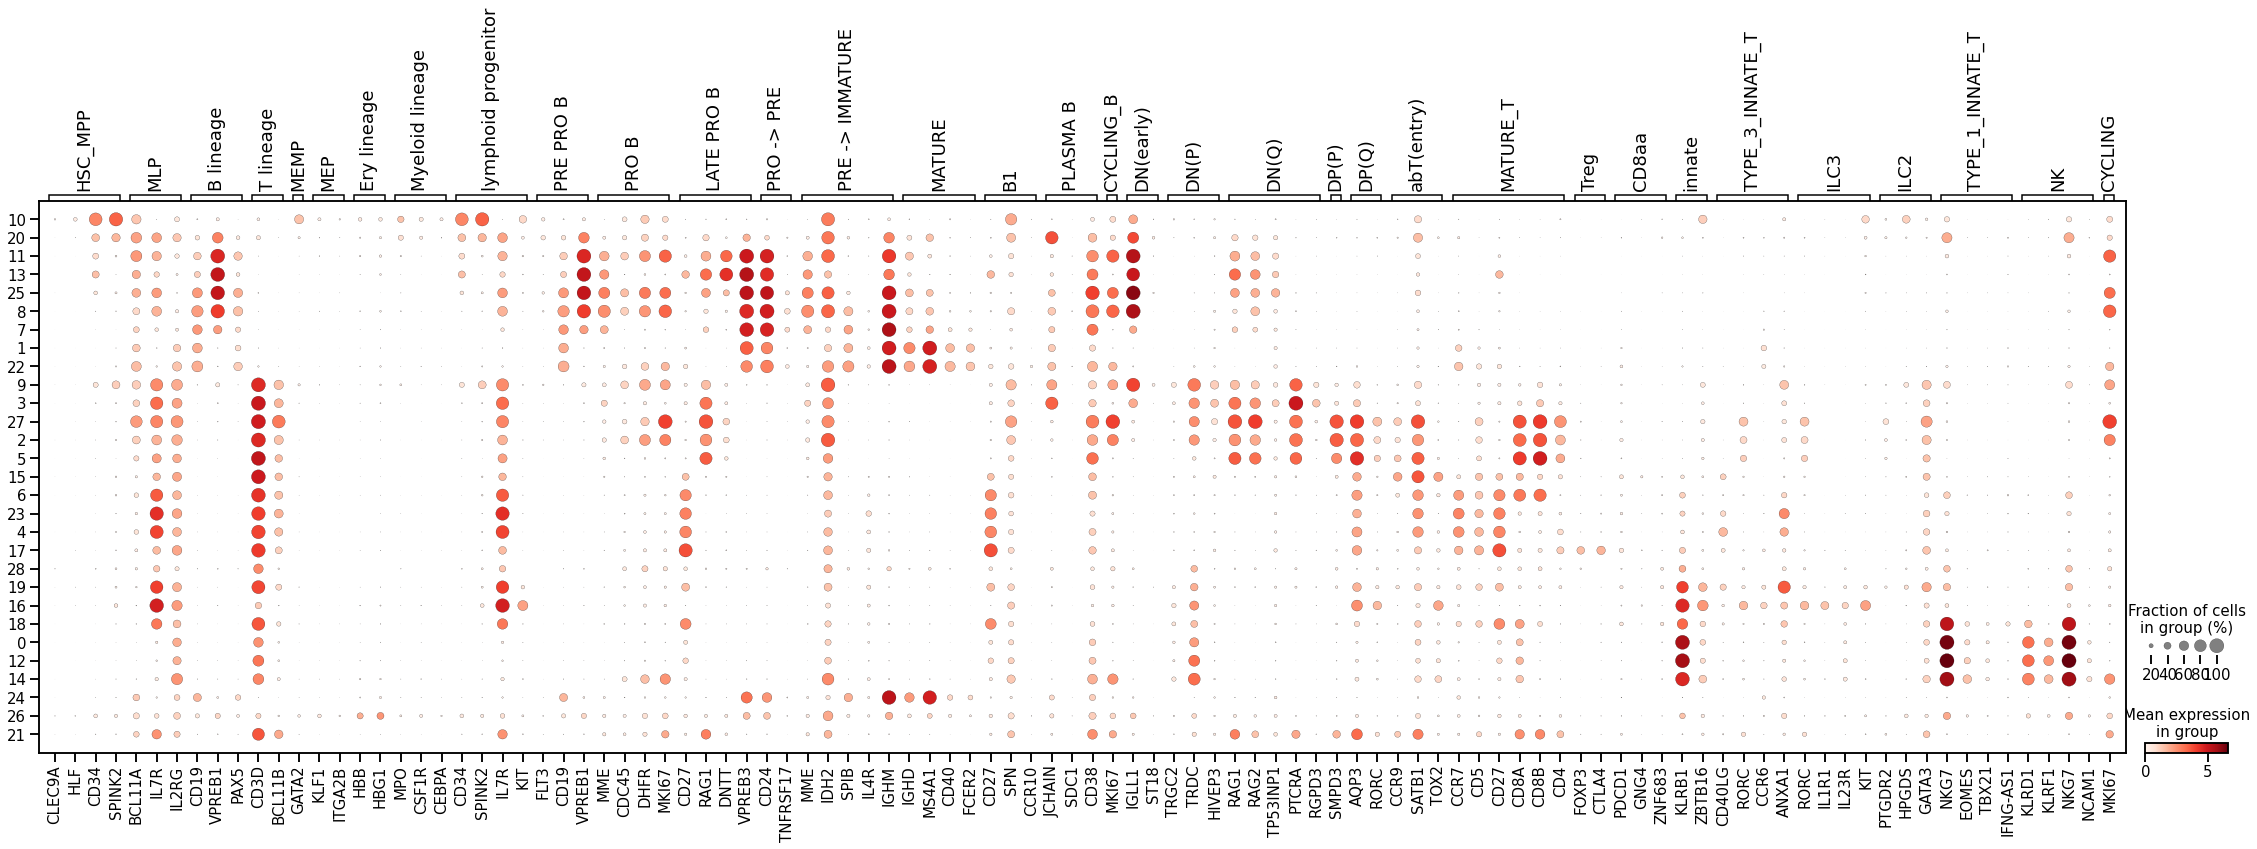

In [194]:
sc.pl.dotplot(adata, markers, 'leiden_150', categories_order=col_order, swap_axes=False,
              dendrogram=False, use_raw=False, save='LYMPHOID_NEW_dotplot.pdf')

### Annotation round 1
To find low quality clusters

In [195]:
new_cluster_names = dict(zip(conf_mat.idxmax().index, conf_mat.idxmax().values))
new_cluster_names

{'10': 'HSC_MPP',
 '20': 'PRE_PRO_B',
 '11': 'PRO_B',
 '13': 'LATE_PRO_B',
 '25': 'LARGE_PRE_B',
 '8': 'LARGE_PRE_B',
 '7': 'SMALL_PRE_B',
 '1': 'MATURE_B',
 '22': 'B1',
 '9': 'DN(P)_T',
 '3': 'DN(Q)_T',
 '27': 'DP(P)_T',
 '2': 'DP(P)_T',
 '5': 'DP(Q)_T',
 '15': 'ABT(ENTRY)',
 '6': 'CD8+T',
 '23': 'CD4+T',
 '4': 'CD4+T',
 '17': 'TREG',
 '28': 'CYCLING_T',
 '19': 'TYPE_3_INNATE_T',
 '16': 'ILC3',
 '18': 'TYPE_1_INNATE_T',
 '0': 'NK',
 '12': 'NK',
 '14': 'CYCLING_NK',
 '24': 'HIGH_MITO',
 '26': 'HIGH_MITO',
 '21': 'HIGH_MITO'}

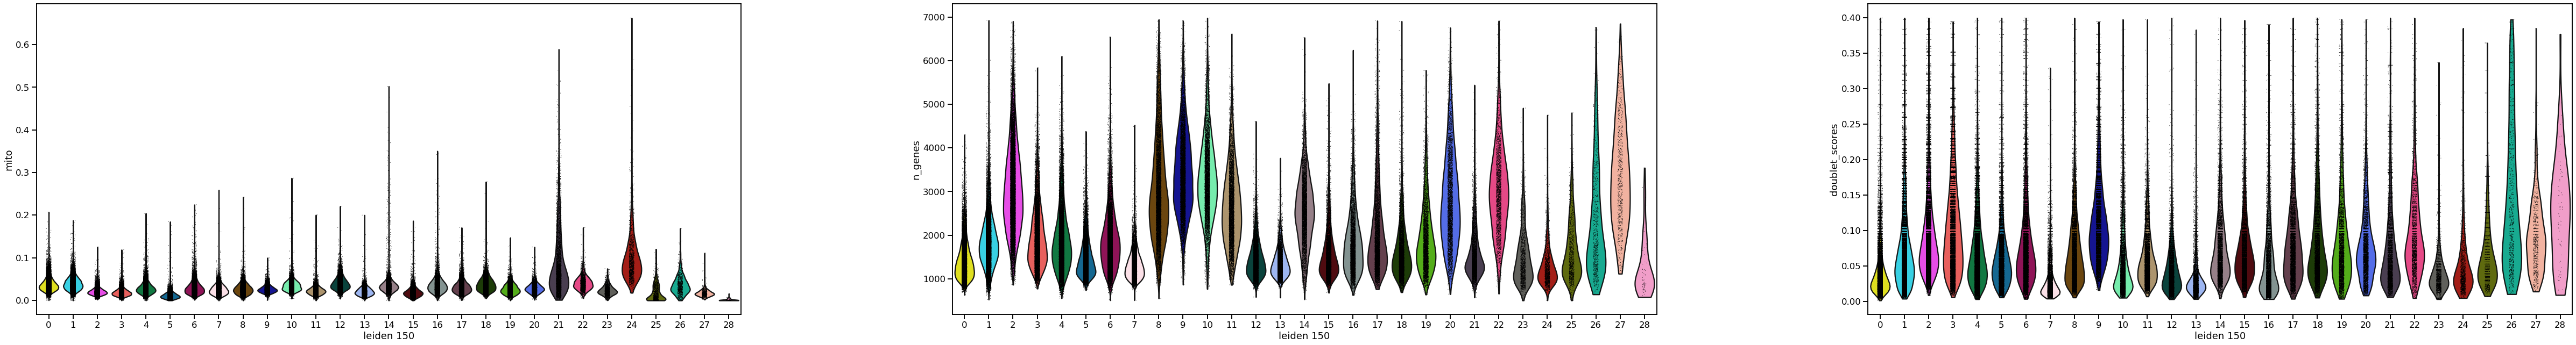

In [207]:
sc.pl.violin(adata, ['mito', 'n_genes','doublet_scores'],groupby='leiden_150', ncol=1)

Proposed updated annotation

In [212]:
new_cluster_names_checked = {
    '10': 'HSC_MPP', # to be annotated w progenitors
 '20': 'MLP_PRE_PRO_B', # mix
 '11': 'PRO_B',
 '13': 'LATE_PRO_B',
 '25': 'LOW_Q_B_PROGENITORS', # very odd shape and QC metrics similar to other lowQ clusters, Chenqu pls check!!
 '8': 'LARGE_PRE_B',
 '7': 'SMALL_PRE_B',
 '1': 'MATURE_B',
 '22': 'B1',
 '9': 'DN(P)_T',
 '3': 'DN(Q)_T',
 '27': 'LOW_Q_DP_T', ## check
 '2': 'DP(P)_T',
 '5': 'DP(Q)_T',
 '15': 'ABT(ENTRY)',
 '6': 'CD8+T',
 '23': 'CD4+T', ## check
 '4': 'CD4+T',
 '17': 'TREG',
 '28': 'DOUBLETS', ## check
 '19': 'TYPE_3_INNATE_T', ## this is an interesting one if you look on UMAP
    ## what if we have found the gdT cells??
 '16': 'ILC3',
 '18': 'TYPE_1_INNATE_T',
 '0': 'NK',
 '12': 'NK',
 '14': 'CYCLING_NK',
 '24': 'HIGH_MITO',
 '26': 'HIGH_MITO',
 '21': 'HIGH_MITO'}

## Which clusters to exclude as low quality for new embedding?
flag_low_q = ['HIGH_MITO', 'DOUBLETS', 'LOW_Q_B_PROGENITORS']

adata.obs['annotation_4qc'] = [new_cluster_names_checked[x] for x in adata.obs['leiden_150']]

highQ_obs = adata.obs_names[~adata.obs['annotation_4qc'].isin(flag_low_q)]

### Save postQC cells

In [213]:
adata_raw = sc.read_h5ad(data_dir + f"PAN.A01.v01.entire_data_raw_count.20210429.{spl}.h5ad")

## Re-save raw object post-QC
sdata = adata[highQ_obs].copy()
sdata.write_h5ad('{d}PAN.A01.v01.entire_data_normalised_log.20210429.LYMPHOID_NEW_POSTQC.h5ad'.format(d=data_dir))
sdata_raw = adata_raw[highQ_obs].copy() 
sdata_raw.write_h5ad('{d}PAN.A01.v01.entire_data_raw_count.20210429.{s}_POSTQC.h5ad'.format(d=data_dir, s=spl))

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
... storing 'annotation_4qc' as categorical
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


## MYELOID

In [67]:
data_dir = '/nfs/team205/ed6/data/Fetal_immune/'
spl = 'MYELOID_NEW_POSTQC'

adata = sc.read_h5ad(data_dir + f"PAN.A01.v01.entire_data_normalised_log.20210429.{spl}.h5ad")
adata.var_names_make_unique()

## Load old annotations
adata.obs['annotation_obs'] = obs.loc[adata.obs_names]['anno_lvl_2_final_clean']

... storing 'annotation_obs' as categorical


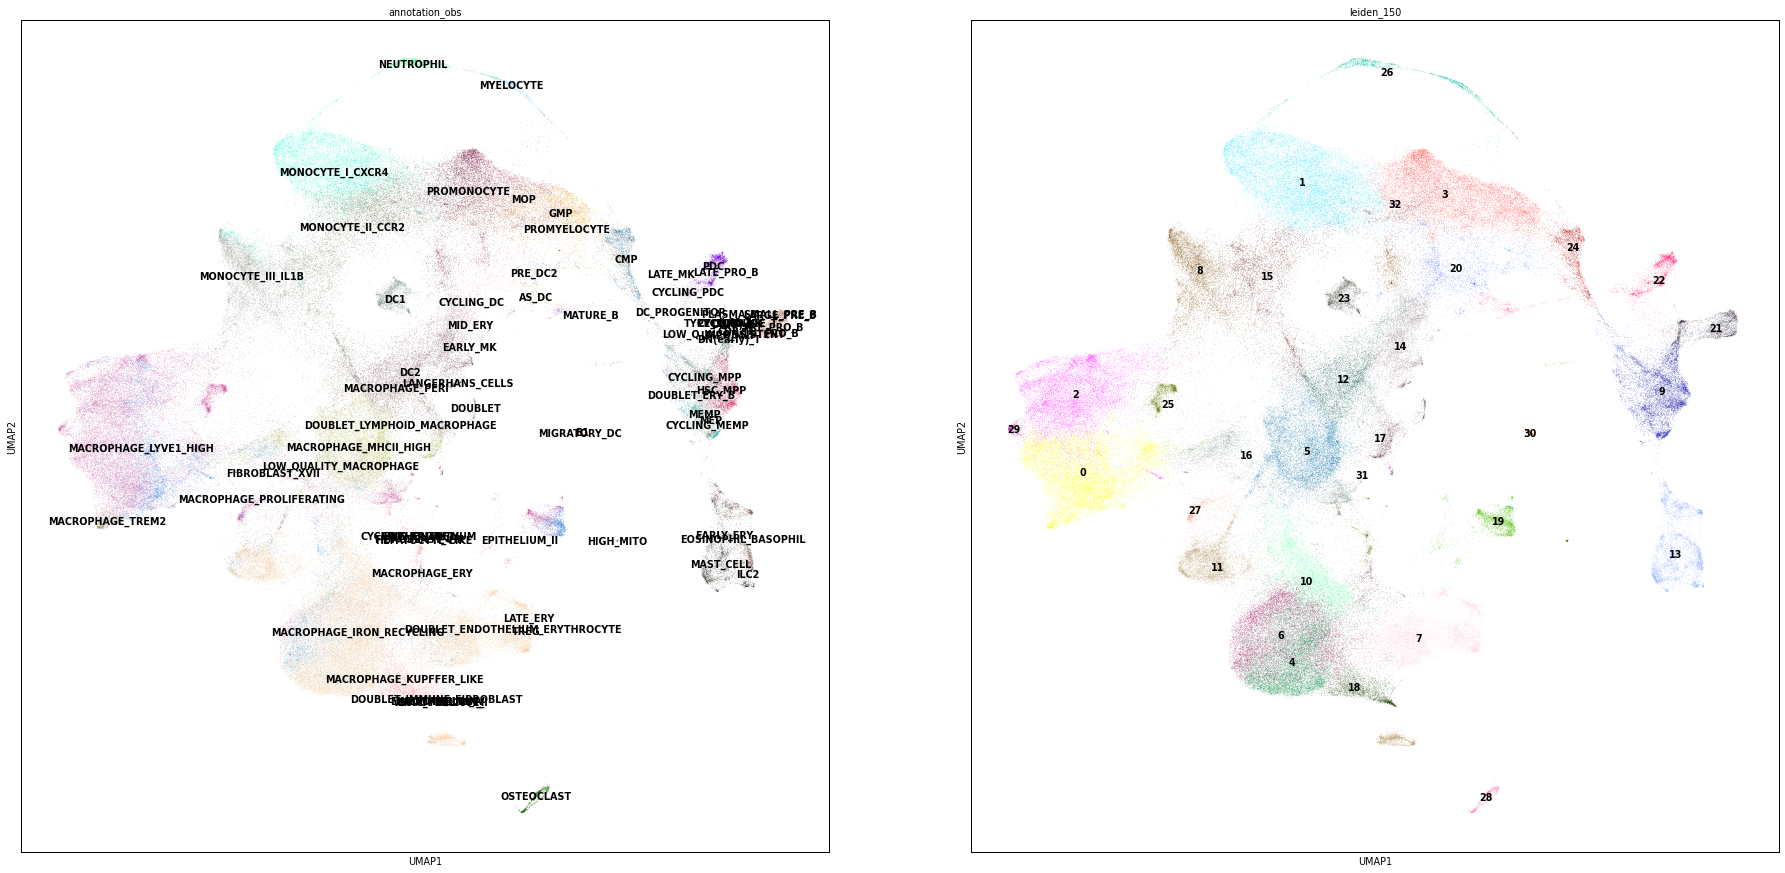

In [68]:
plt.rcParams['figure.figsize'] = [15,15]
sns.set_context("paper")
sc.pl.umap(adata, color=['annotation_obs', 'leiden_150'], legend_loc='on data', save='UMAPs_MYELOID_NEW_POSTQC.png')

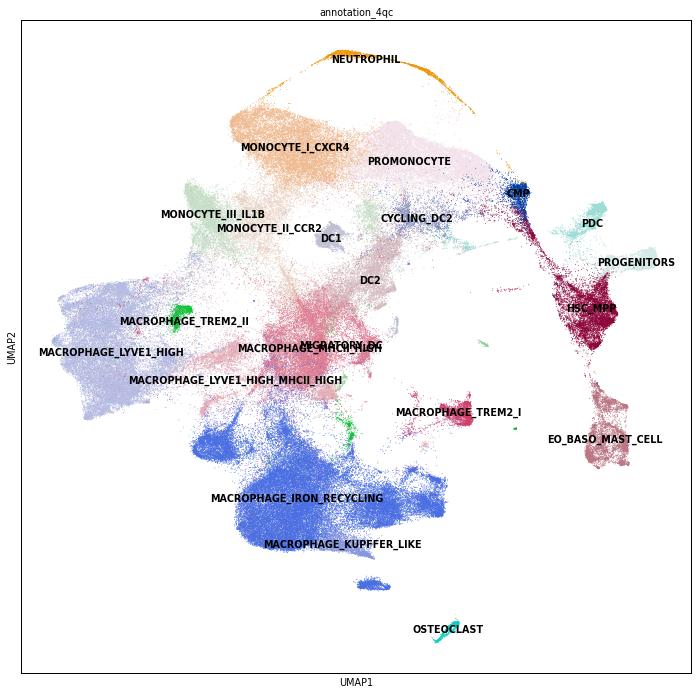

In [69]:
plt.rcParams['figure.figsize'] = [12,12]
sc.pl.umap(adata, color=['annotation_4qc'], legend_loc='on data', size=3)

In [70]:
# markers = pd.read_csv('../../metadata/marker_genes/B_marker_genes_09072021_clean.csv', index_col=0)
# markers_dict = {a:markers.loc[markers['anno_lvl_2']==a, 'gene'].tolist() for a in markers['anno_lvl_2'].unique()}
markers = {
            ## Progenitors
            'HSC_MPP':['CLEC9A','HLF','CD34','SPINK2'],
           'MLP':['BCL11A','IL7R','IL2RG'],
           'B lineage':['CD19','VPREB1','PAX5'],
           'T lineage':['CD3D','BCL11B'],
           'MEMP':['GATA2'],
           'MEP':['KLF1','ITGA2B'],
           'Ery lineage':['HBB','HBG1'],
           'Myeloid lineage':['MPO','CSF1R','CEBPA'],
    ## Myeloid 
    'Early Progenitor':["CD34",	"SPINK2",	"MLLT3"],
'Myeloid_progenitor':["PRSS57",	"PRTN3",	"AZU1",],
'Neutrophil lineage':["ELANE",	"DEFA4",	"LCN2",	"LTF",	"ORM1",],
'Monocyte_lineage':["CD52",	"S100A8",	"MS4A6A",	"CD14",	"CXCR4",	"CCR2",	"IL1B",	"CD300E",],
'DC_progenitor':["ACY3",	"TIFAB",	"KIF17",],
'pDC':["CLEC4C",	"JCHAIN",	"IRF7",],
'ASDC':["SIGLEC6",	"AXL",],
'DC2':["CLEC10A",	"CD1C",],
'DC1':["CLEC9A",	"BATF3",],
'MIGRATORY_DC':["CCR7",	"LAMP3",],
'LANGERHANS_CELLS':["IDO1","CD207",	"CD1A",],
'EO_BASO_MAST':["CLC",	"KIT",	"TPSAB1",],
'MACROPHAGE_LYVE1_HIGH':["F13A1",	"LYVE1",	"SPP1",],
 'MACROPHAGE_IRON_RECYCLING':["CD5L",	"APOE",	"VCAM1",],
 'MACROPHAGE_PROLIFERATING':["TOP2A",	"MKI67",],
 'MACROPHAGE_MHCII_HIGH':["HLA-DRA",	"HLA-DPA1",	"CLEC7A",],
 'MACROPHAGE_KUPFFER_LIKE':["ENG",	"KDR",	"CAV1",],
 'MACROPHAGE_TREM2':["TREM2",	"P2RY12",],
'OSTEOCLAST':["MMP9",	"ACP5",]
    #
          }

cell_type_order = [
 'PROMYELOCYTE',
 'MYELOCYTE',
 'NEUTROPHIL',
 'MOP',
 'PROMONOCYTE',
 'MONOCYTE_I_CXCR4',
 'MONOCYTE_II_CCR2',
 'MONOCYTE_III_IL1B',
 'DC_PROGENITOR',
 'PDC',
 'CYCLING_PDC',
'AS_DC',
 'PRE_DC2',
 'CYCLING_DC',
 'DC2',
 'DC1',
 'MIGRATORY_DC',
'LANGERHANS_CELLS',
'EOSINOPHIL_BASOPHIL',
 'MAST_CELL',
'MACROPHAGE_LYVE1_HIGH',
 'MACROPHAGE_IRON_RECYCLING',
 'MACROPHAGE_PROLIFERATING',
 'MACROPHAGE_MHCII_HIGH',
 'MACROPHAGE_KUPFFER_LIKE',
 'MACROPHAGE_TREM2',
 'OSTEOCLAST'
]

cell_type_order = anno_groups_dict['PROGENITORS'] + cell_type_order + anno_groups_dict['OTHER']
# anno_groups_dict['PROGENITORS']

### Confusion matrix

In [71]:
conf_mat = sc.metrics.confusion_matrix( 'leiden_150', 'annotation_obs', adata.obs, normalize=True).T

## Keep cts that make up at least 1% of a cluster
keep_cts_ixs = np.where(conf_mat.max(1) > 0.01)[0] 
conf_mat = conf_mat.iloc[keep_cts_ixs]

## Reorder annotations
conf_mat_order = [x for x in cell_type_order if x in conf_mat.index] + conf_mat.index[~conf_mat.index.isin(cell_type_order)].tolist()
conf_mat = conf_mat.loc[conf_mat_order]

## Sort to have some sort of diagonal
col_order = conf_mat.idxmax(0).astype('category').cat.set_categories(cell_type_order).sort_values().index
conf_mat = conf_mat[col_order]

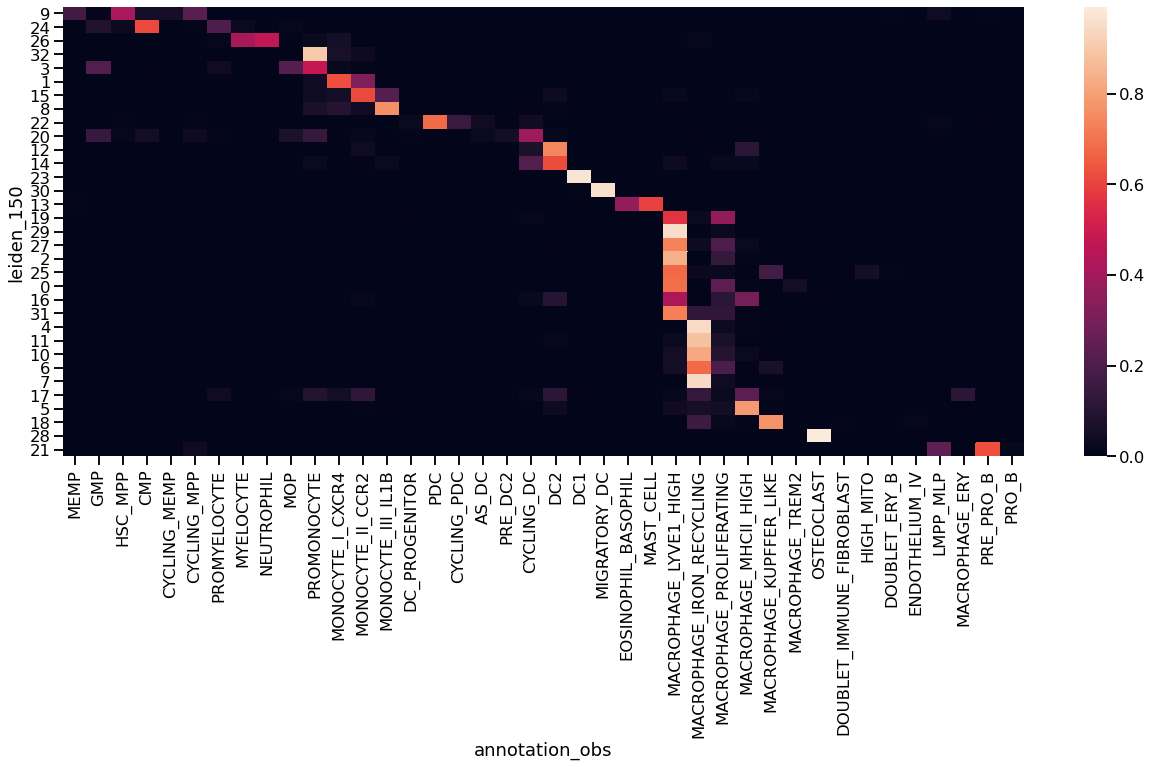

In [72]:
sns.set_context('talk')
plt.rcParams['figure.figsize'] = [18,11]
sns.heatmap(conf_mat.T, xticklabels=True, yticklabels=True);
plt.tight_layout();
plt.savefig(figdir + 'MYELOID_NEW_POSTQC_confusion_mat.pdf')

### Marker dotplot

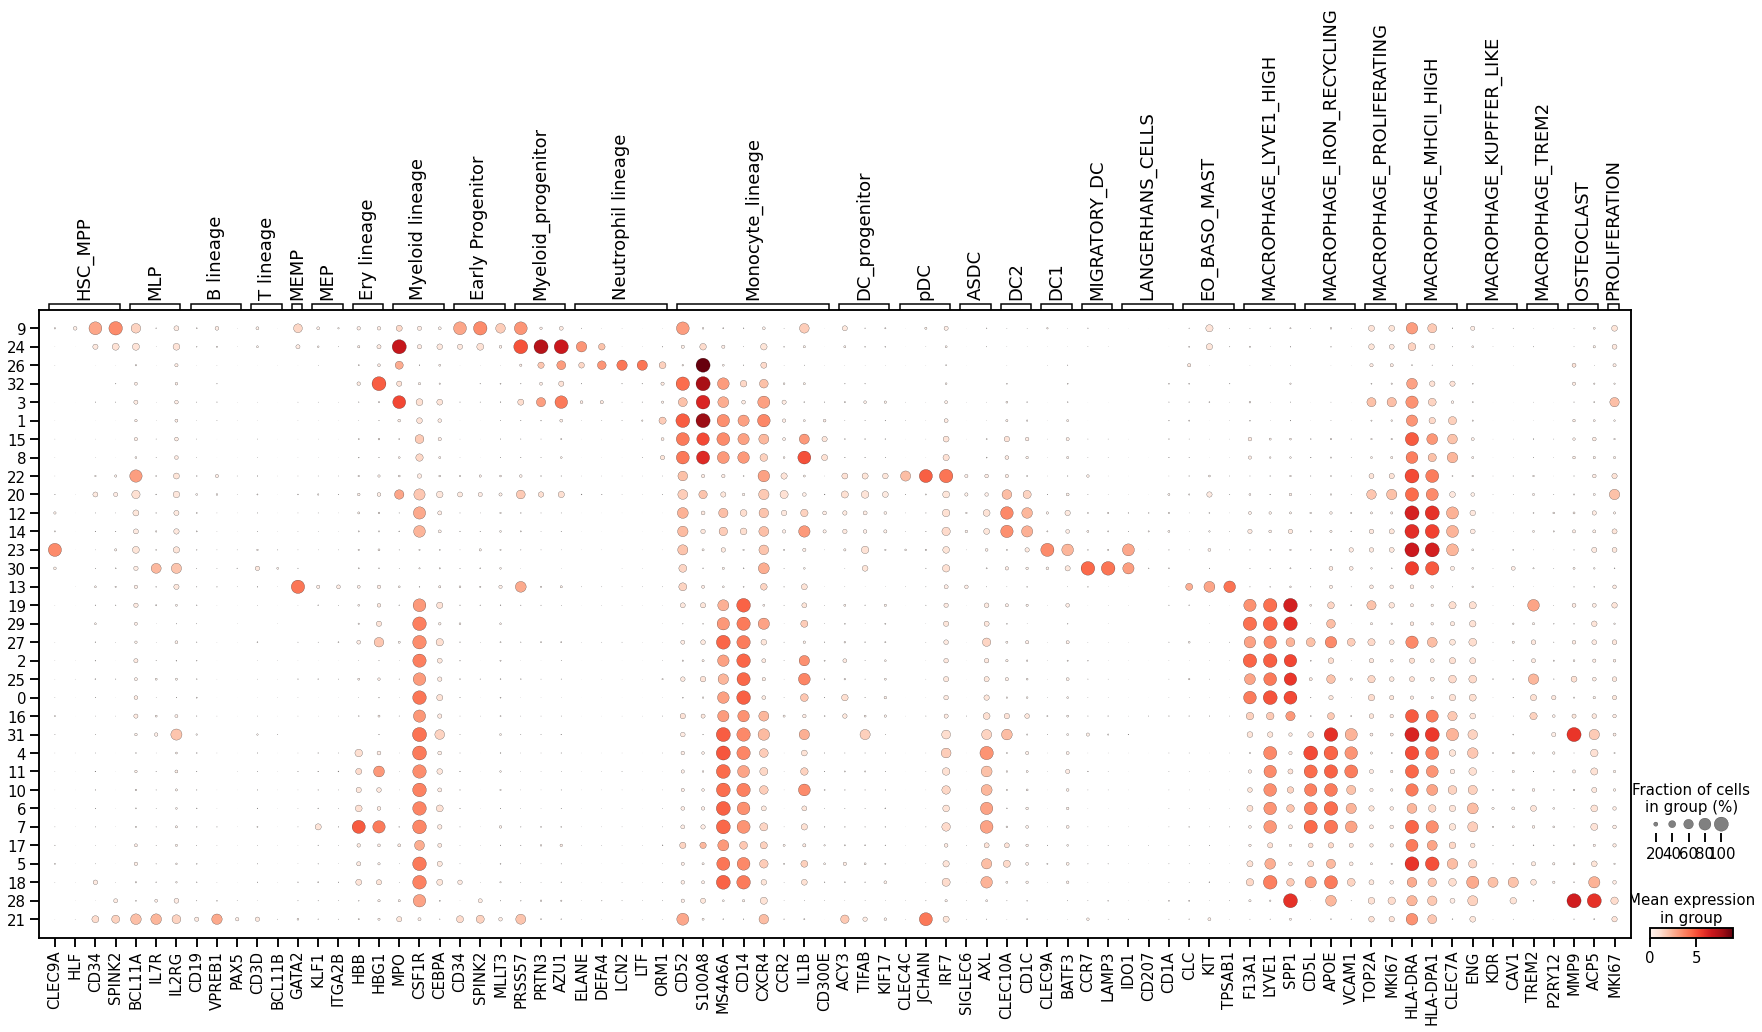

In [73]:
markers['PROLIFERATION'] = ['MKI67']
sc.pl.dotplot(adata, markers, 'leiden_150', categories_order=col_order, swap_axes=False,
              dendrogram=False, use_raw=False, save='MYELOID_NEW_POSTQC_dotplot.pdf')

In [74]:
## Lifting annotations from old version
new_cluster_names = dict(zip(conf_mat.idxmax().index, conf_mat.idxmax().values))
new_cluster_names

{'9': 'HSC_MPP',
 '24': 'CMP',
 '26': 'NEUTROPHIL',
 '32': 'PROMONOCYTE',
 '3': 'PROMONOCYTE',
 '1': 'MONOCYTE_I_CXCR4',
 '15': 'MONOCYTE_II_CCR2',
 '8': 'MONOCYTE_III_IL1B',
 '22': 'PDC',
 '20': 'CYCLING_DC',
 '12': 'DC2',
 '14': 'DC2',
 '23': 'DC1',
 '30': 'MIGRATORY_DC',
 '13': 'MAST_CELL',
 '19': 'MACROPHAGE_LYVE1_HIGH',
 '29': 'MACROPHAGE_LYVE1_HIGH',
 '27': 'MACROPHAGE_LYVE1_HIGH',
 '2': 'MACROPHAGE_LYVE1_HIGH',
 '25': 'MACROPHAGE_LYVE1_HIGH',
 '0': 'MACROPHAGE_LYVE1_HIGH',
 '16': 'MACROPHAGE_LYVE1_HIGH',
 '31': 'MACROPHAGE_LYVE1_HIGH',
 '4': 'MACROPHAGE_IRON_RECYCLING',
 '11': 'MACROPHAGE_IRON_RECYCLING',
 '10': 'MACROPHAGE_IRON_RECYCLING',
 '6': 'MACROPHAGE_IRON_RECYCLING',
 '7': 'MACROPHAGE_IRON_RECYCLING',
 '17': 'MACROPHAGE_MHCII_HIGH',
 '5': 'MACROPHAGE_MHCII_HIGH',
 '18': 'MACROPHAGE_KUPFFER_LIKE',
 '28': 'OSTEOCLAST',
 '21': 'PRE_PRO_B'}

... storing 'annotation_lift' as categorical


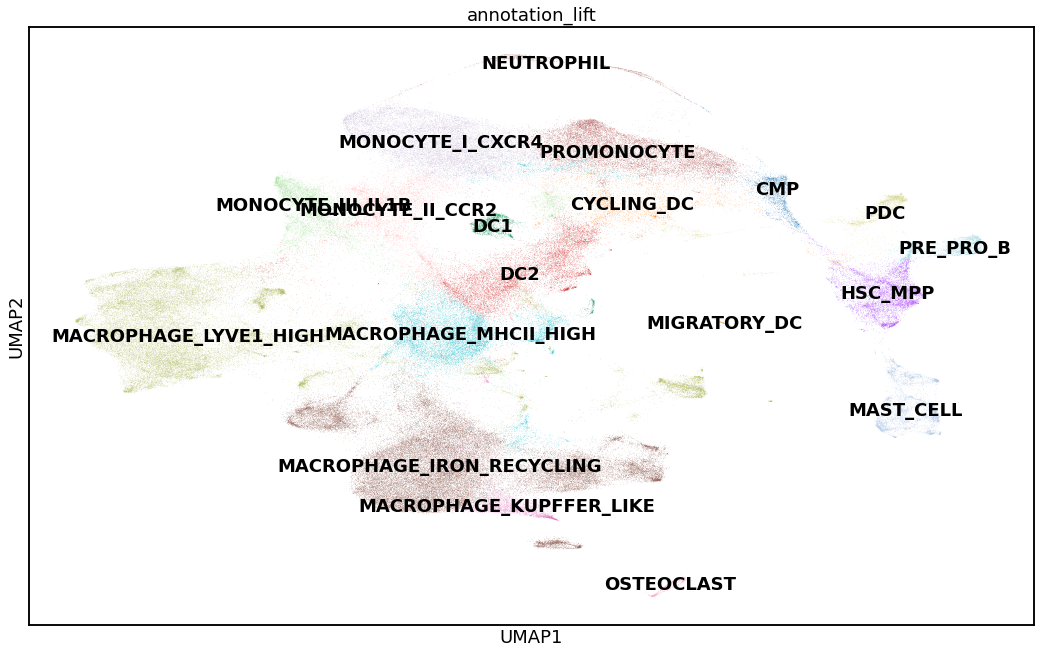

In [75]:
adata.obs['annotation_lift'] = [new_cluster_names[x] for x in adata.obs['leiden_150']]

sc.pl.umap(adata, color='annotation_lift', legend_loc='on data')

## STROMA

In [76]:
data_dir = '/nfs/team205/ed6/data/Fetal_immune/'
spl = 'STROMA_NEW_POSTQC'
adata = sc.read_h5ad(data_dir + f"PAN.A01.v01.entire_data_normalised_log.20210429.{spl}.h5ad")
adata.var_names_make_unique()

In [77]:
## Load old annotations
adata.obs['annotation_obs'] = obs.loc[adata.obs_names]['anno_lvl_2_final_clean']

... storing 'annotation_obs' as categorical


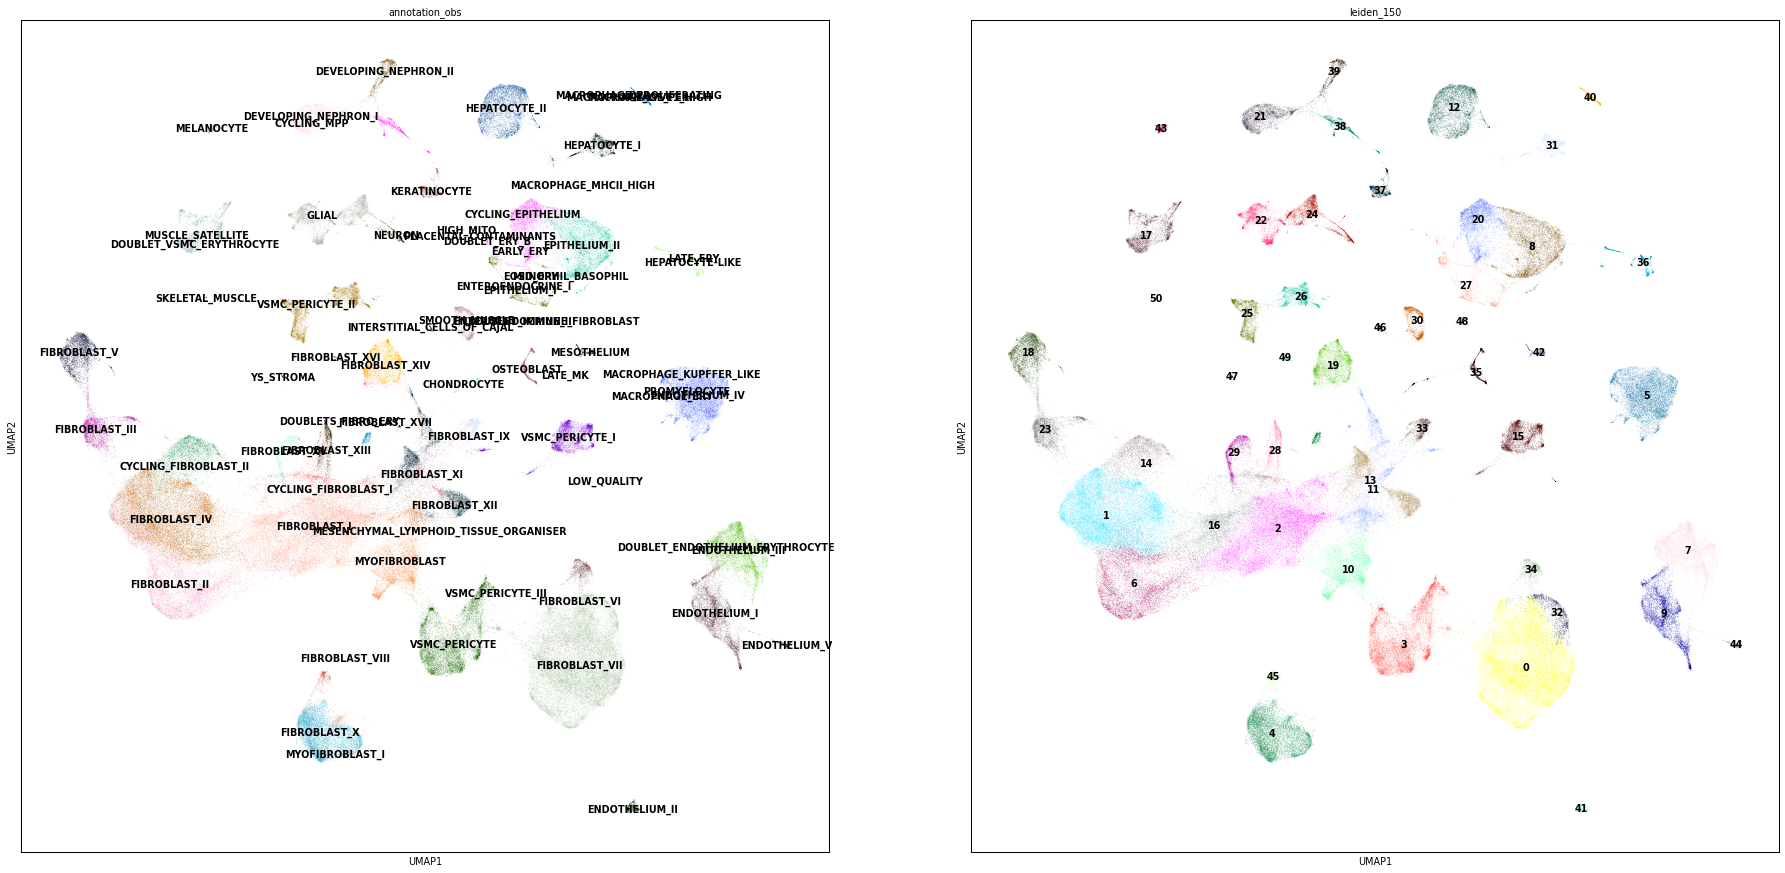

In [78]:
plt.rcParams['figure.figsize'] = [15,15]
sns.set_context("paper")
sc.pl.umap(adata, color=['annotation_obs', 'leiden_150'], legend_loc='on data', save='UMAPs_STROMA_NEW_POSTQC.png')

In [79]:
# markers = pd.read_csv('../../metadata/marker_genes/B_marker_genes_09072021_clean.csv', index_col=0)
# markers_dict = {a:markers.loc[markers['anno_lvl_2']==a, 'gene'].tolist() for a in markers['anno_lvl_2'].unique()}
markers = {
           'FIBROBLAST':['PDGFRA'],
           'SPLENIC FIBRO':['NKX2-5'],
           'MYOFIBROBLAST':['ACTA2'],
           'MYSENCHYMAL LYMPHOID TISSUE ORGANISER':['CCL19','CCL21','CXCL13'],
           'MUSCLE SATELLITE CELLS':['PAX7','MYOD1','MYF5'],
           'SKELETAL MUSCLE':['MYL1','ACTA1','TNNT3'],
           'SMOOTH MUSCLE':['MYH11','TAGLN','ACTA2','DES'],
           'MESOTHELIUM':['UPK3B','LRRN4'],
           'OSTEOBLAST':['IBSP','PHOSPHO1','IFITM5'],
           'CHONDROCYTE':['CSPG4','COL9A1','HAPLN1'],
           'GLIAL CELL':['SOX10','SOX2'],
           'NEURON':['TUBB2B','STMN4','ELAVL3'],
           'MELANOCYTE':['PMEL','TYR','TYRP1','MLANA'],
           'KERATINOCYTE':['KRT14','KRT5','GATA3'],
           'HEPATOCYTE':['APOA1','ALB','AFP'],
           'DEVELOPING NEPHRON':['PAX2'],
           'EPITHELIUM':['EPCAM','CDH1','KRT19'],
           'INTERSTITIAL CELLS OF CAJAL':['ETV1','KIT'],
           'ENTEROENDOCRINE CELL':['CHGA','NEUROD1','NEUROG3'],
           'ENDOTHELIUM':['CDH5','PECAM1','CD34'],
           'VSMC/PERICYTE':['ACTA2','TAGLN','RGS5'],
           'PERIVASCULAR MACROPHAGE':['C1QA','RNASE1','LYVE1'],
           'CYCLING':['MKI67'],
           'ERY':['HBB'],
           'IMMUNE':['PTPRC'],
           'CYCLING':['MKI67']
          }

cell_type_order = [ 'FIBROBLAST_I','FIBROBLAST_II','FIBROBLAST_III','FIBROBLAST_IV','FIBROBLAST_IX','FIBROBLAST_V',
  'FIBROBLAST_VI','FIBROBLAST_VII','FIBROBLAST_VIII','FIBROBLAST_X','FIBROBLAST_XI','FIBROBLAST_XII',
  'FIBROBLAST_XIII','FIBROBLAST_XIV','FIBROBLAST_XV','FIBROBLAST_XVI','CYCLING_FIBROBLAST_I','CYCLING_FIBROBLAST_II',
  'MYOFIBROBLAST','MYOFIBROBLAST_I','MESENCHYMAL_LYMPHOID_TISSUE_ORGANISER','MUSCLE_SATELLITE','SKELETAL_MUSCLE',
  'SMOOTH_MUSCLE','MESOTHELIUM','OSTEOBLAST','CHONDROCYTE','GLIAL','NEURON','MELANOCYTE','KERATINOCYTE','HEPATOCYTE_I',
  'HEPATOCYTE_II','HEPATOCYTE-LIKE','DEVELOPING_NEPHRON_I','DEVELOPING_NEPHRON_II','EPITHELIUM_I','EPITHELIUM_II',
  'YS_STROMA','CYCLING_EPITHELIUM','INTERSTITIAL_CELLS_OF_CAJAL','ENTEROENDOCRINE_I','ENTEROENDOCRINE_II','ENDOTHELIUM_I',
  'ENDOTHELIUM_II','ENDOTHELIUM_III','ENDOTHELIUM_IV','ENDOTHELIUM_V', 'VSMC_PERICYTE','VSMC_PERICYTE_I', 'VSMC_PERICYTE_II',
  'MACROPHAGE_PERI','DOUBLET_ENDOTHELIUM_ERYTHROCYTE','DOUBLET_IMMUNE_FIBROBLAST','LOW_QUALITY']

cell_type_order = list(set(cell_type_order + anno_groups_dict['OTHER']))

### Confusion matrix

In [80]:
conf_mat = sc.metrics.confusion_matrix( 'leiden_150', 'annotation_obs', adata.obs, normalize=True).T

## Keep cts that make up at least 1% of a cluster
keep_cts_ixs = np.where(conf_mat.max(1) > 0.01)[0] 
conf_mat = conf_mat.iloc[keep_cts_ixs]

## Reorder annotations
conf_mat_order = [x for x in cell_type_order if x in conf_mat.index] + conf_mat.index[~conf_mat.index.isin(cell_type_order)].tolist()
conf_mat = conf_mat.loc[conf_mat_order]

## Sort to have some sort of diagonal
col_order = conf_mat.idxmax(0).astype('category').cat.set_categories(cell_type_order).sort_values().index
conf_mat = conf_mat[col_order]

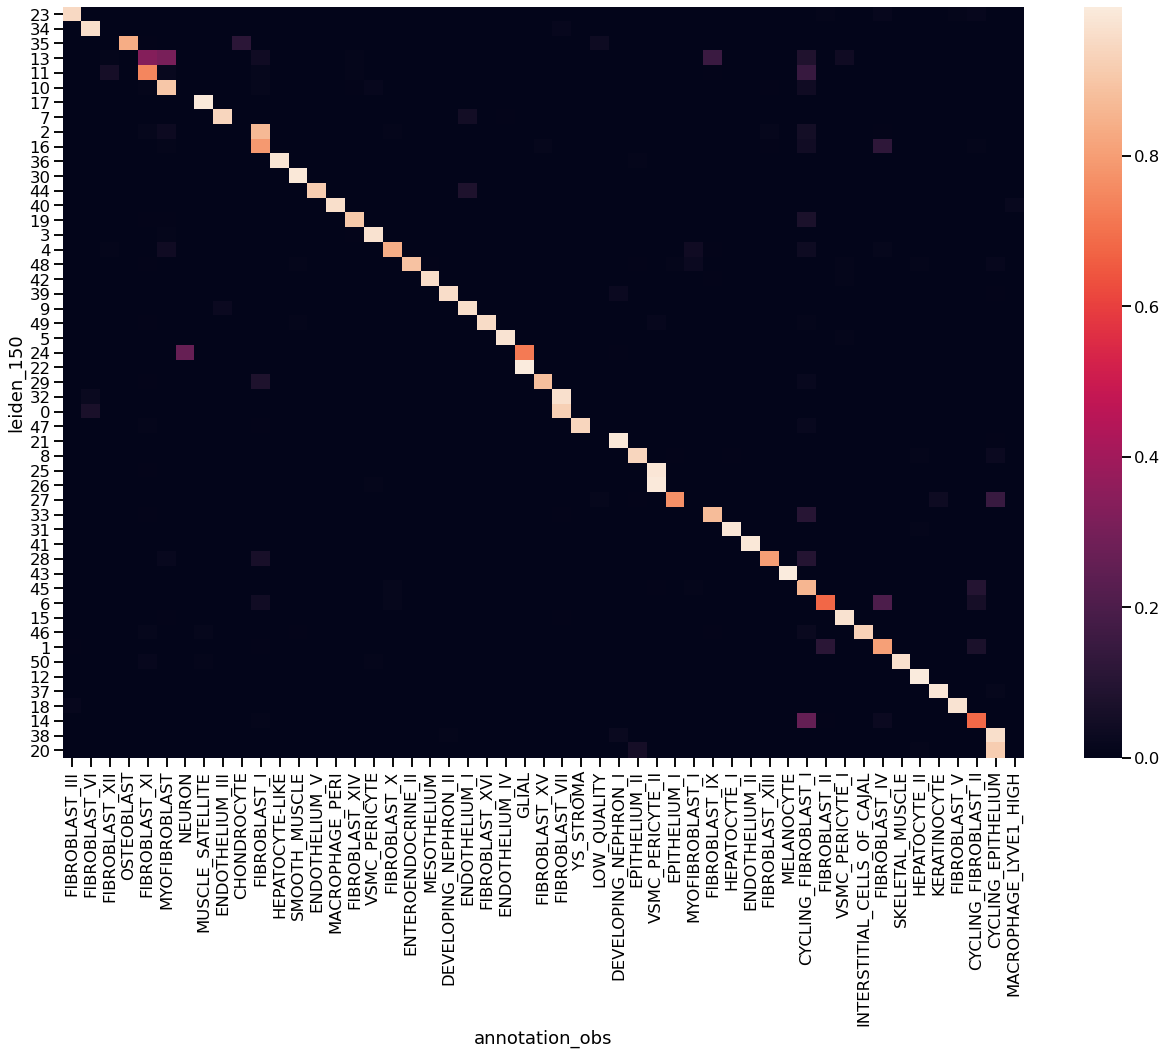

In [81]:
sns.set_context('talk')
plt.rcParams['figure.figsize'] = [18,15]
sns.heatmap(conf_mat.T, xticklabels=True, yticklabels=True);
plt.tight_layout();
plt.savefig(figdir + 'STROMA_NEW_POSTQC_confusion_mat.pdf')

### Marker dotplot

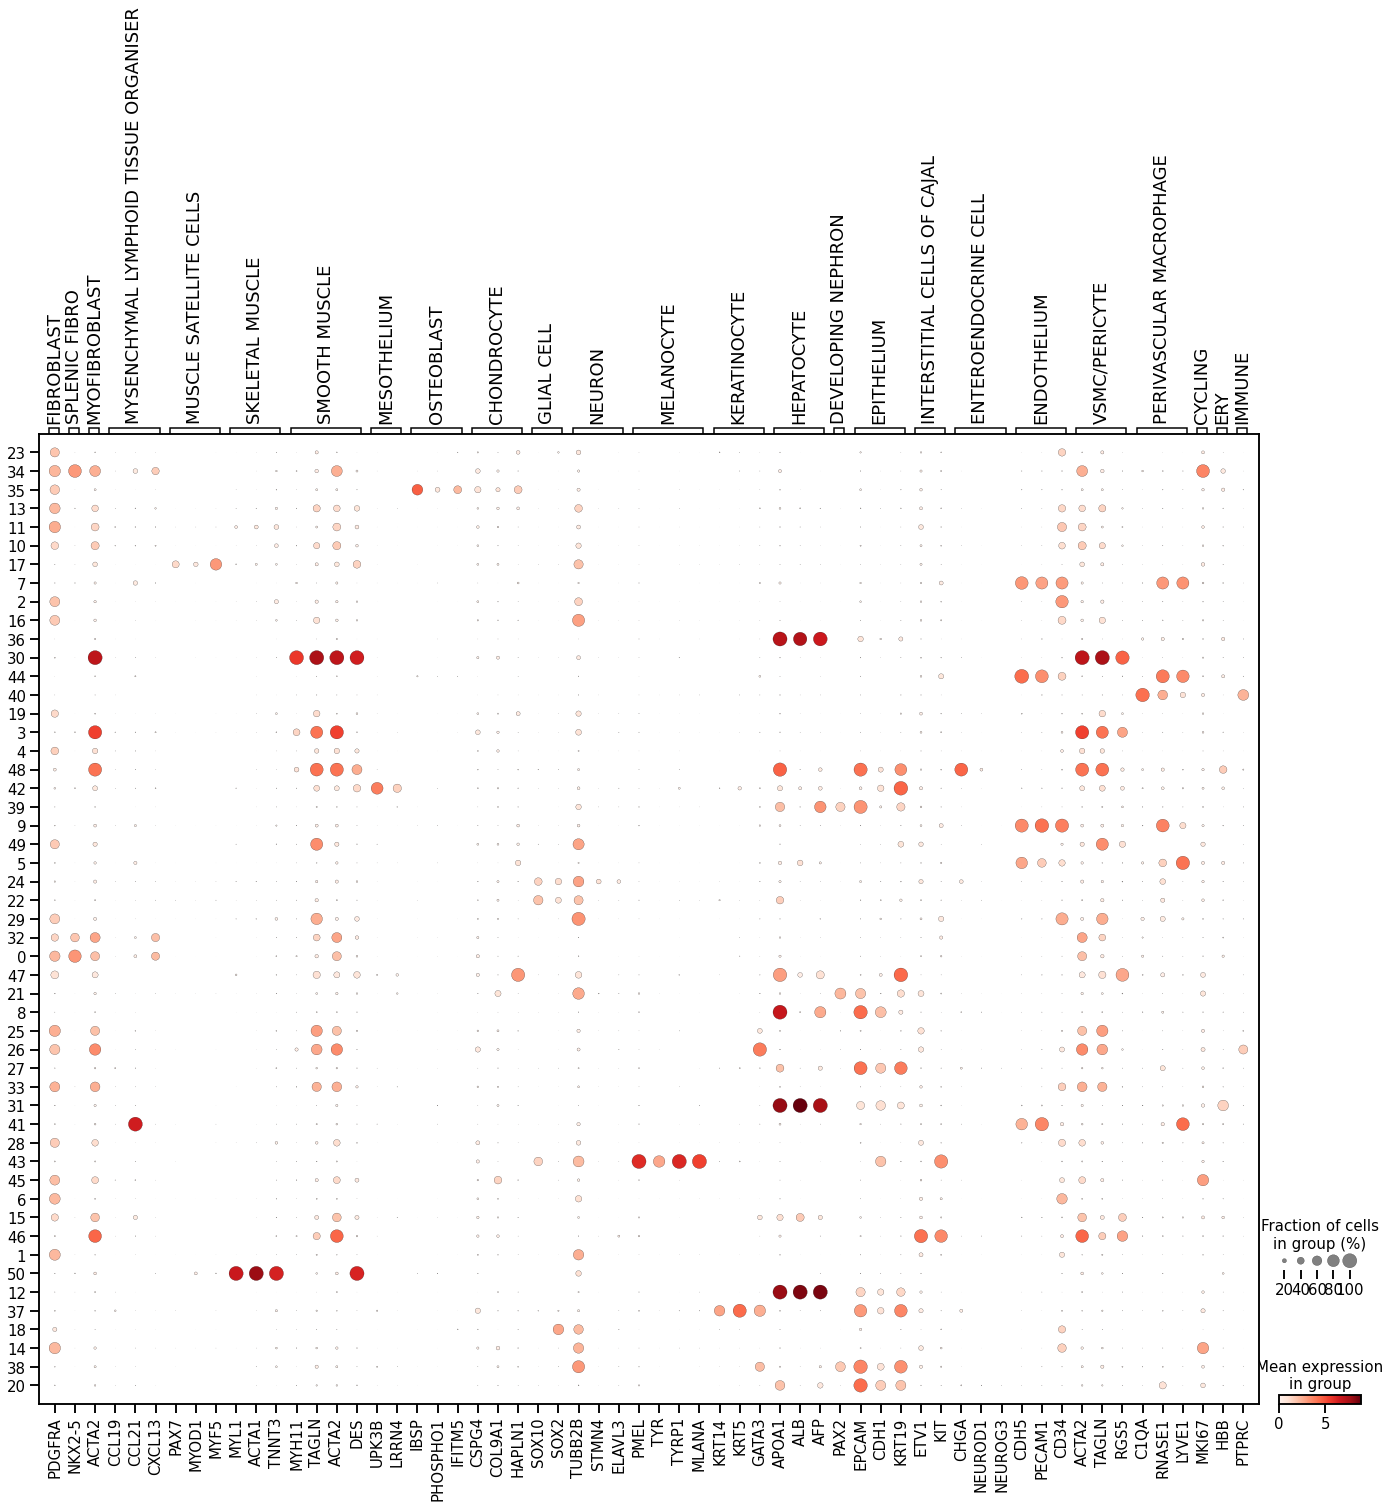

In [82]:
sc.pl.dotplot(adata, markers, 'leiden_150', categories_order=col_order, swap_axes=False,
              dendrogram=False, use_raw=False, save='STROMA_NEW_POSTQC_dotplot.pdf')

### Annotation round 1

In [83]:
new_cluster_names = dict(zip(conf_mat.idxmax().index, conf_mat.idxmax().values))
new_cluster_names

{'23': 'FIBROBLAST_III',
 '34': 'FIBROBLAST_VI',
 '35': 'OSTEOBLAST',
 '13': 'FIBROBLAST_XI',
 '11': 'FIBROBLAST_XI',
 '10': 'MYOFIBROBLAST',
 '17': 'MUSCLE_SATELLITE',
 '7': 'ENDOTHELIUM_III',
 '2': 'FIBROBLAST_I',
 '16': 'FIBROBLAST_I',
 '36': 'HEPATOCYTE-LIKE',
 '30': 'SMOOTH_MUSCLE',
 '44': 'ENDOTHELIUM_V',
 '40': 'MACROPHAGE_PERI',
 '19': 'FIBROBLAST_XIV',
 '3': 'VSMC_PERICYTE',
 '4': 'FIBROBLAST_X',
 '48': 'ENTEROENDOCRINE_II',
 '42': 'MESOTHELIUM',
 '39': 'DEVELOPING_NEPHRON_II',
 '9': 'ENDOTHELIUM_I',
 '49': 'FIBROBLAST_XVI',
 '5': 'ENDOTHELIUM_IV',
 '24': 'GLIAL',
 '22': 'GLIAL',
 '29': 'FIBROBLAST_XV',
 '32': 'FIBROBLAST_VII',
 '0': 'FIBROBLAST_VII',
 '47': 'YS_STROMA',
 '21': 'DEVELOPING_NEPHRON_I',
 '8': 'EPITHELIUM_II',
 '25': 'VSMC_PERICYTE_II',
 '26': 'VSMC_PERICYTE_II',
 '27': 'EPITHELIUM_I',
 '33': 'FIBROBLAST_IX',
 '31': 'HEPATOCYTE_I',
 '41': 'ENDOTHELIUM_II',
 '28': 'FIBROBLAST_XIII',
 '43': 'MELANOCYTE',
 '45': 'CYCLING_FIBROBLAST_I',
 '6': 'FIBROBLAST_II',
 '15': 

... storing 'annotation_lift' as categorical


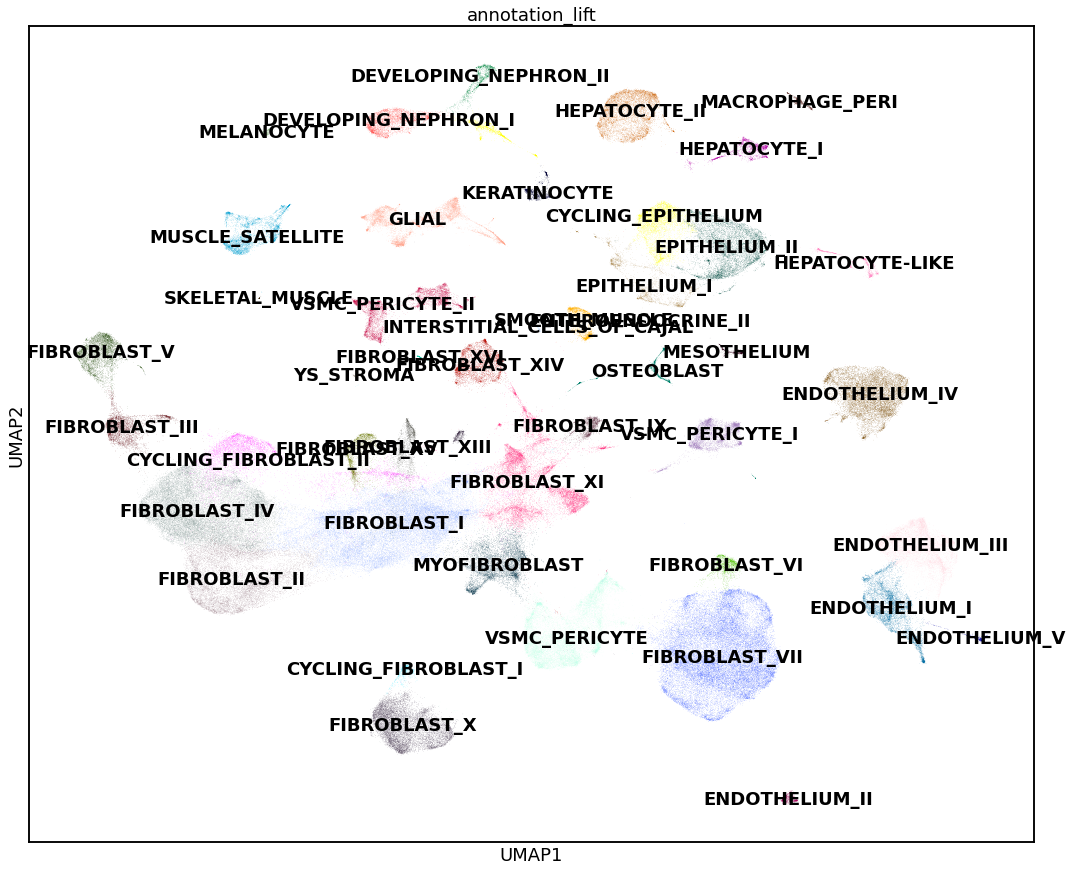

In [84]:
adata.obs['annotation_lift'] = [new_cluster_names[x] for x in adata.obs['leiden_150']]
sc.pl.umap(adata, color='annotation_lift', legend_loc='on data')

## ERYTHROID_NEW

In [40]:
data_dir = '/nfs/team205/ed6/data/Fetal_immune/'
spl = 'MEM_PROGENITORS_NEW_POSTQC'
adata = sc.read_h5ad(data_dir + f"PAN.A01.v01.entire_data_normalised_log.20210429.{spl}.h5ad")
adata.var_names_make_unique()

In [60]:
keep_obs = adata.obs['annotation_obs'].value_counts()[adata.obs['annotation_obs'].value_counts() > 20].index.astype("str").tolist()

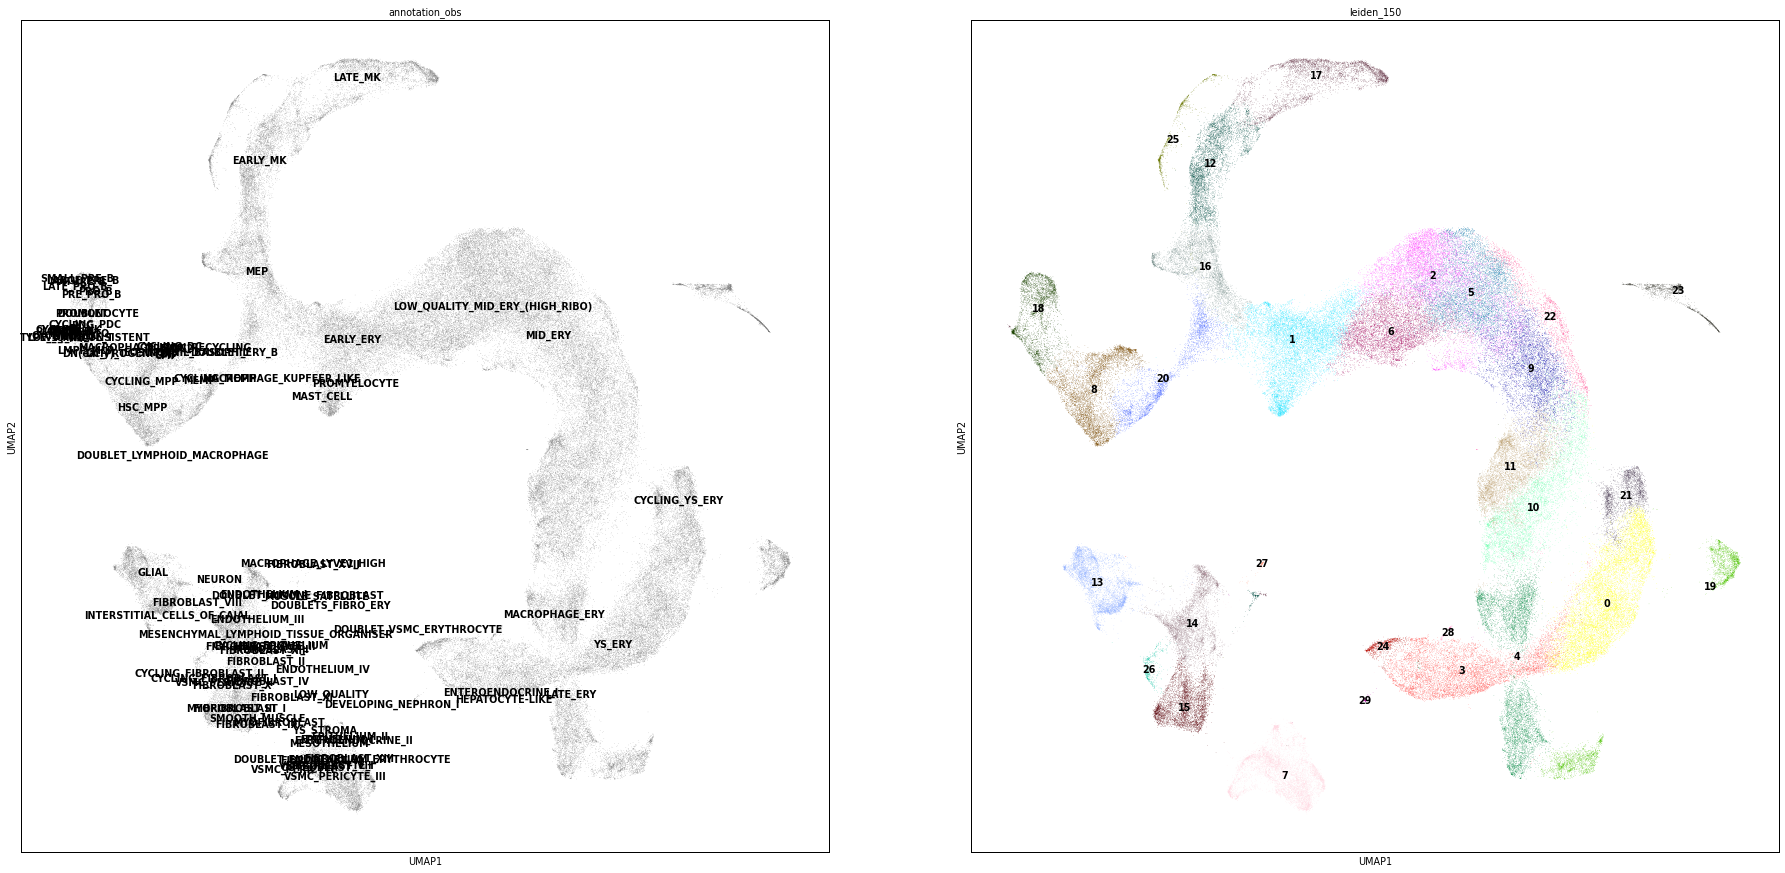

In [63]:
plt.rcParams['figure.figsize'] = [15,15]
sns.set_context("paper")
sc.pl.umap(adata, color=['annotation_obs', 'leiden_150'], legend_loc='on data', save='UMAPs_MEM_PROGENITORS_NEW_POSTQC.png')

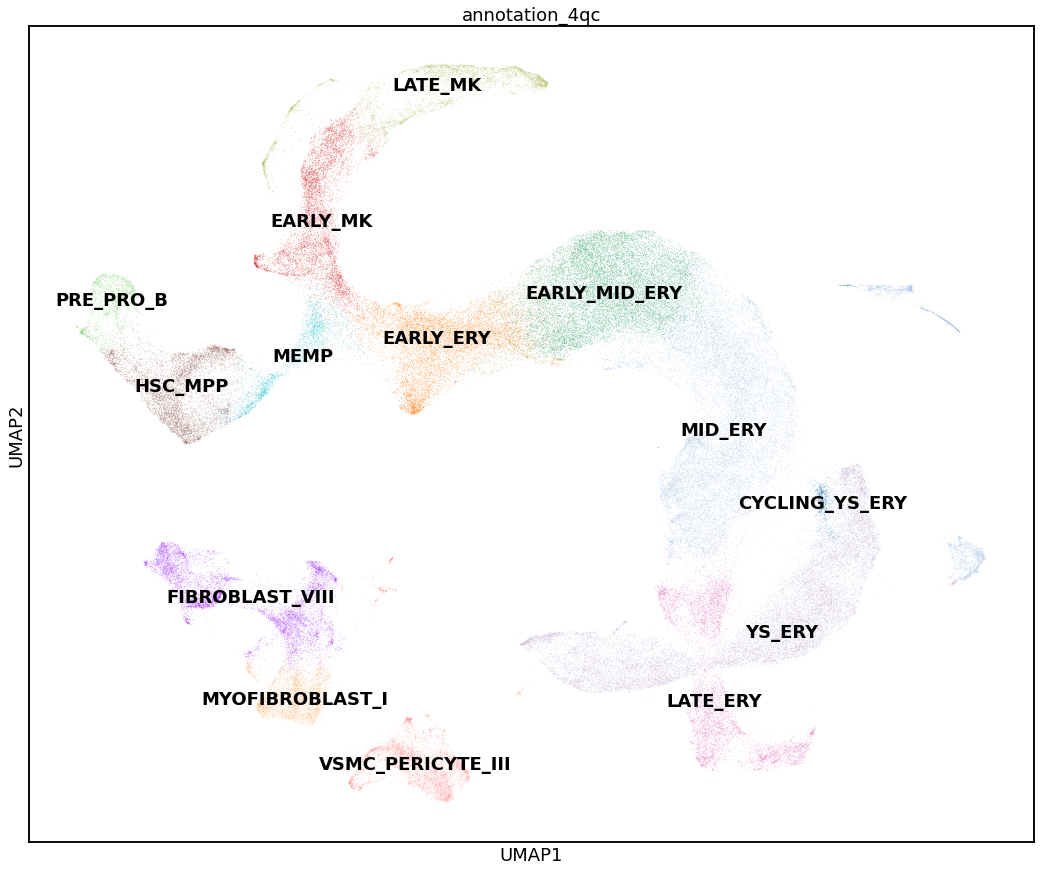

In [52]:
sc.pl.umap(adata, color=['annotation_4qc'], legend_loc='on data')

In [43]:
# markers = pd.read_csv('../../metadata/marker_genes/B_marker_genes_09072021_clean.csv', index_col=0)
# markers_dict = {a:markers.loc[markers['anno_lvl_2']==a, 'gene'].tolist() for a in markers['anno_lvl_2'].unique()}
markers = {
          "Megakaryocyte Erythroid Precursors":['TESPA1','GATA2','FCER1A'],
"Early_ERY":['KLF1','APOE','FAM178B'],
"Mid_ERY":[ 'BLVRB', 'CD36', 'OAT',],
"Late_ERY":[ 'GYPA', 'GYPB', 'SLC4A1'],
"YS_ERY" : ['HBZ','HBE1'],
"Early_MK":['HBD','PF4'],
"late_MK":['ITGA2B','ITGB3','CLK1'],
"VSMC_PERICYTE_III":['PDGFRA', 'TAGLN','RGS5'],
'MACROPHAGE_ERY':["C1QA","CD163"],
"Proliferating" : ["TOP2A","MKI67"],
          }

cell_type_order = [  'MEMP',
 'CYCLING_MEMP',
 'MEP',
 'EARLY_ERY',
 'MID_ERY',
 'LATE_ERY',
 'YS_ERY',
 'CYCLING_YS_ERY',
 'EARLY_MK',
 'LATE_MK',
 'VSMC_PERICYTE_III',
 'MACROPHAGE_ERY']

cell_type_order = list(set(anno_groups_dict['PROGENITORS'] + cell_type_order + anno_groups_dict['OTHER']))

### Confusion matrix

In [44]:
conf_mat = sc.metrics.confusion_matrix( 'leiden_150', 'annotation_obs', adata.obs, normalize=True).T

## Keep cts that make up at least 1% of a cluster
keep_cts_ixs = np.where(conf_mat.max(1) > 0.01)[0] 
conf_mat = conf_mat.iloc[keep_cts_ixs]

## Reorder annotations
conf_mat_order = [x for x in cell_type_order if x in conf_mat.index] + conf_mat.index[~conf_mat.index.isin(cell_type_order)].tolist()
conf_mat = conf_mat.loc[conf_mat_order]

## Sort to have some sort of diagonal
col_order = conf_mat.idxmax(0).astype('category').cat.set_categories(cell_type_order).sort_values().index
conf_mat = conf_mat[col_order]

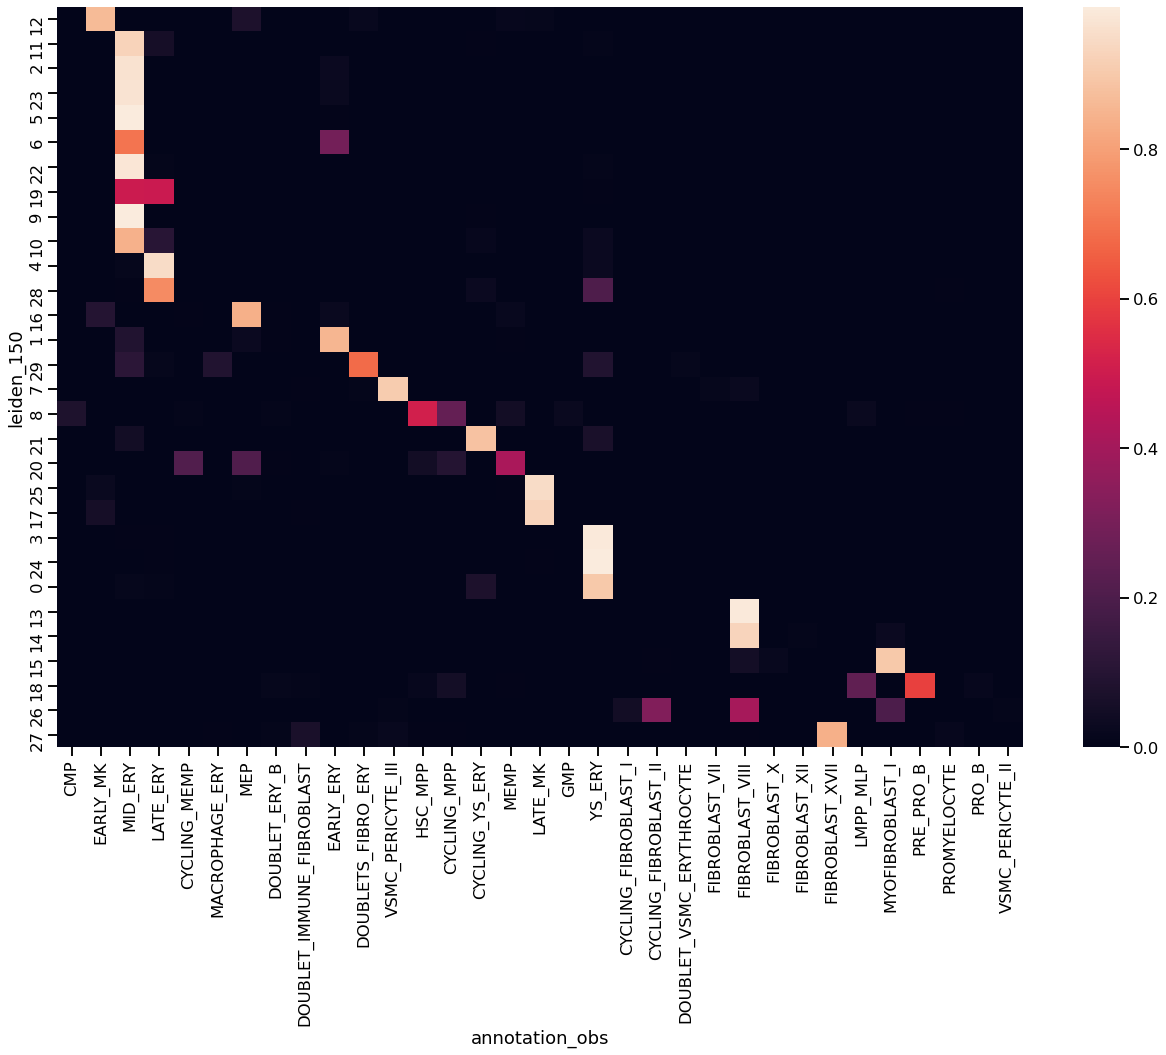

In [45]:
sns.set_context('talk')
plt.rcParams['figure.figsize'] = [18,15]
sns.heatmap(conf_mat.T, xticklabels=True, yticklabels=True);
plt.tight_layout();
plt.savefig(figdir + 'MEM_PROGENITORS_NEW_POSTQC_confusion_mat.pdf')

### Marker dotplot

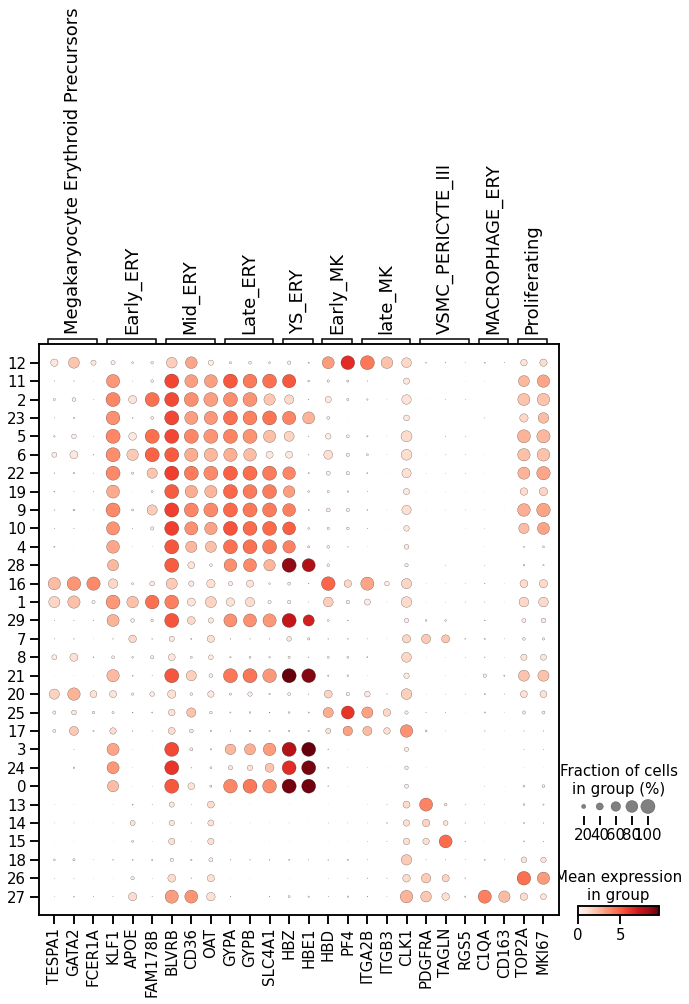

In [46]:
sc.pl.dotplot(adata, markers, 'leiden_150', categories_order=col_order, swap_axes=False,
              dendrogram=False, use_raw=False, save='MEM_PROGENITORS_NEW_POSTQC_dotplot.pdf')

### Annotation round 1

In [47]:
new_cluster_names = dict(zip(conf_mat.idxmax().index, conf_mat.idxmax().values))

In [48]:
new_cluster_names

{'12': 'EARLY_MK',
 '11': 'MID_ERY',
 '2': 'MID_ERY',
 '23': 'MID_ERY',
 '5': 'MID_ERY',
 '6': 'MID_ERY',
 '22': 'MID_ERY',
 '19': 'MID_ERY',
 '9': 'MID_ERY',
 '10': 'MID_ERY',
 '4': 'LATE_ERY',
 '28': 'LATE_ERY',
 '16': 'MEP',
 '1': 'EARLY_ERY',
 '29': 'DOUBLETS_FIBRO_ERY',
 '7': 'VSMC_PERICYTE_III',
 '8': 'HSC_MPP',
 '21': 'CYCLING_YS_ERY',
 '20': 'MEMP',
 '25': 'LATE_MK',
 '17': 'LATE_MK',
 '3': 'YS_ERY',
 '24': 'YS_ERY',
 '0': 'YS_ERY',
 '13': 'FIBROBLAST_VIII',
 '14': 'FIBROBLAST_VIII',
 '15': 'MYOFIBROBLAST_I',
 '18': 'PRE_PRO_B',
 '26': 'FIBROBLAST_VIII',
 '27': 'FIBROBLAST_XVII'}

... storing 'annotation_lift' as categorical


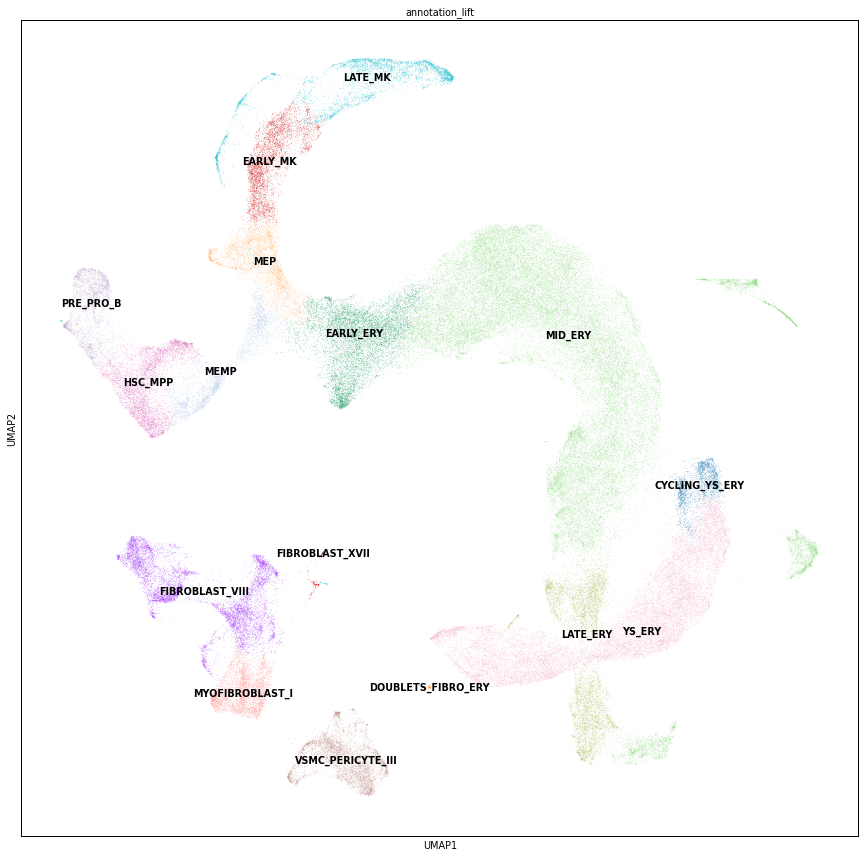

In [66]:
adata.obs['annotation_lift'] = [new_cluster_names[x] for x in adata.obs['leiden_150']]

sc.pl.umap(adata, color='annotation_lift', legend_loc='on data')